**Module Paths**

In [1]:
import os

os.chdir("./../../")

# Deep Q-Network (DQN)
---
In this notebook, we will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### Preparatory step

### 1. Import the Necessary Packages

In [2]:
import torch
from utils import get_device

device = get_device()

In [3]:
import numpy as np
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use("ggplot")
np.set_printoptions(precision=3, linewidth=120)

is_ipython = "inline" in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [4]:
from env import Gym
from policy import RandomPolicy

env = Gym("lunarlander")

print(env.get_observation_space())
print(env.get_action_space())

Box([-1.5   -1.5   -5.    -5.    -3.142 -5.    -0.    -0.   ], [1.5   1.5   5.    5.    3.142 5.    1.    1.   ], (8,), float32)
Discrete(4)


Score:  -122.95309613634421


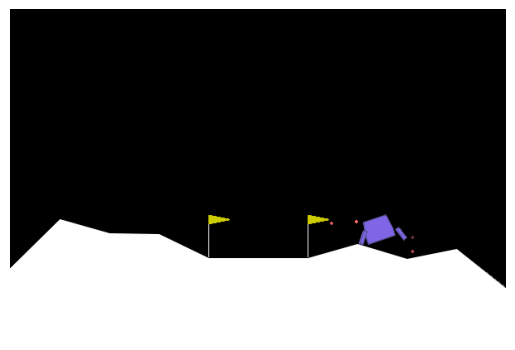

In [5]:
random_policy = RandomPolicy(env.get_action_space())
env.watch(random_policy, display)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [7]:
from qtable import DictionaryQTable
from policy import DQNPolicy

q_table = DictionaryQTable()
q_table.initialize(env.get_action_space().n)

state_size = 8
action_size = 4
seed = 0
policy = DQNPolicy(
    state_size=state_size,
    action_size=action_size,
    model=QNetwork,
    seed=seed,
    device=device,
)

### 3. Train the Agent with DQN

In [8]:
from train import TrainerDQN

In [9]:
trainer = TrainerDQN(policy, env)
scores = trainer.train(5_000)


Environment solved in 731 episodes!	Average Score: 200.48


In [10]:
trainer.evaluate(100)

Evaluation: Average reward over 100 episodes: 226.36


np.float64(226.36098236926043)

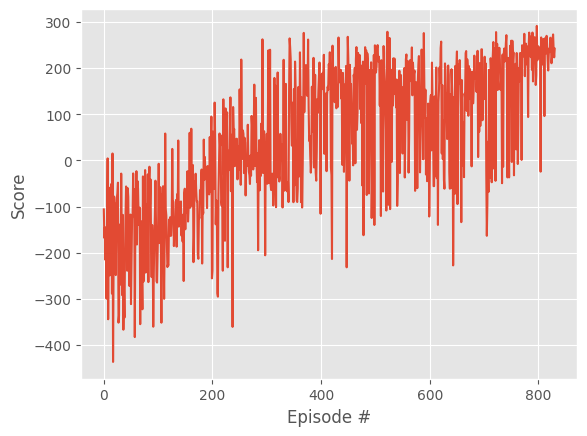

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

Score:  123.1549181805496


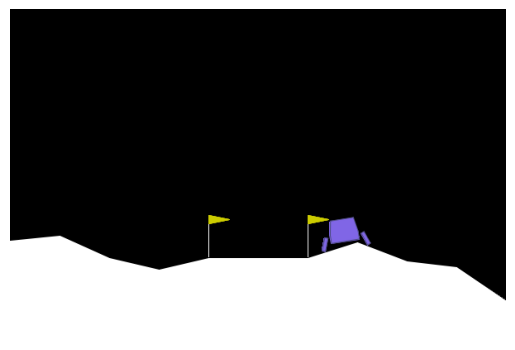

In [12]:
env.watch(policy, display)